In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import glob
import gym
import gym_fourrooms
import seaborn as sns

In [2]:
def show_hist(episode_df, figsize=(10,7), title="", col="state"):
    plt.figure(figsize=figsize)
    vc_s = episode_df[col].value_counts()
    try:
        vc_s.plot.bar()
    except TypeError:
        return
    plt.title(title)
    plt.show()
    plt.close()
    return vc_s

In [3]:
def conditioned(condition, episode_df, col="state"):
    return episode_df[episode_df[col].isin(condition)]

In [4]:
def show_total_steps(episode_df):
    print("total steps is {}".format(len(episode_df)))

In [5]:
def show_hist2d(episode_df, figsize=(10,7)):
    env = gym.make("Fourrooms-v1")
    counts = episode_df["state"].value_counts().tolist()
    states = episode_df["state"].value_counts().index.tolist()
    cells = [list(env.to_cell(state)) for state in states]
    heatmap = np.full([len(env.occupancy), len(env.occupancy[0])], -1000)
    for count, cell in zip(counts, cells):
        heatmap[cell[0], cell[1]] = count
    plt.figure(figsize=figsize)
    sns.heatmap(heatmap, annot=True)

In [6]:

upper_left = [
                            0, 1, 2, 3, 4, 
                            10, 11, 12, 13, 14,
                            20, 21, 22, 23, 24,
                            31, 32, 33, 34, 35,
                            41, 42, 43, 44, 45,
]
upper_right = [
                            5, 6, 7 ,8, 9,
                            15, 16, 17, 18, 19,
                            26, 27, 28, 29, 30,
                            36, 37, 38, 39, 40,
                            46, 47, 48, 49, 50,
                            52, 53, 54, 55, 56,
]
lower_left = [
                            57, 58, 59, 60, 61,
                            63, 64, 65, 66, 67,
                            73, 74, 75, 76, 77,
                            83, 84, 85, 86, 87,
                            94, 95, 96, 97, 98
]
lower_right = [
                            68, 69, 70, 71, 72,
                            78, 79, 80, 81, 82,
                            89, 90, 91, 92, 93,
                            99, 100, 101, 102, 103
]
hall_way = [25, 51, 62, 88]

In [10]:
dir_path = "../res/episode"
file_name = "FlexibleFourrooms-v0-0-strs_qs-eta=1.0-rho=0.9.csv"
q_file_name = "FlexibleFourrooms-v0-0-q-learn-eta=1.0-rho=0.9.csv"

file_path = os.path.join(dir_path, file_name)
q_file_path = os.path.join(dir_path, q_file_name)

episode_df = pd.read_csv(file_path)
q_episode_df = pd.read_csv(q_file_path)

episode_o200_df = episode_df[episode_df["episode"]<=50]
q_episode_o200_df = q_episode_df[q_episode_df["episode"]<=50]

FileNotFoundError: [Errno 2] File b'../res/episode\\FlexibleFourrooms-v0-0-strs_qs-eta=1.0-rho=0.9.csv' does not exist: b'../res/episode\\FlexibleFourrooms-v0-0-strs_qs-eta=1.0-rho=0.9.csv'

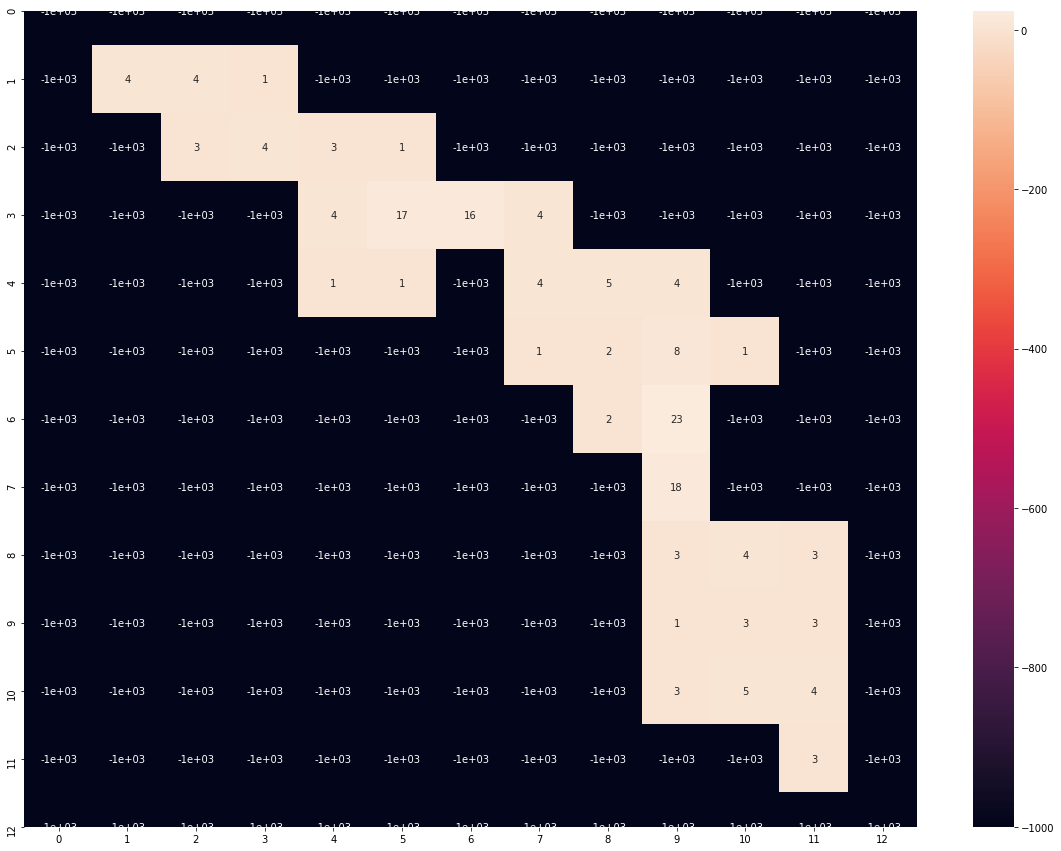

In [50]:
c_file_name = "FlexibleFourrooms-v0-0-mt-sprs-eta=1.0-rho=0.001.csv" #"FlexibleFourrooms-v0-10-strs_qs-eta=1.0-rho=0.91.csv"
c_file_path = os.path.join(dir_path, c_file_name)
c_episode_df = pd.read_csv(c_file_path)
c_episode_o200_df = c_episode_df[(c_episode_df["episode"]>=700)&
                                 (c_episode_df["episode"]<=702)]
show_hist2d(c_episode_o200_df, (20, 15))

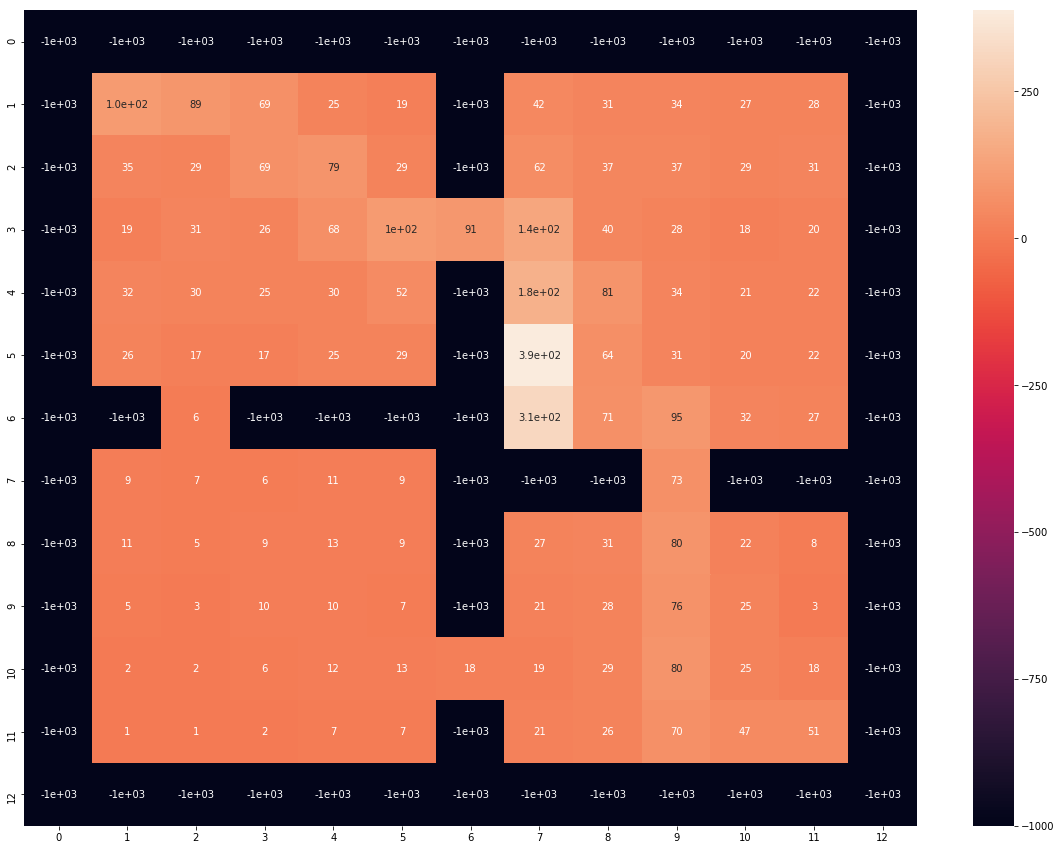

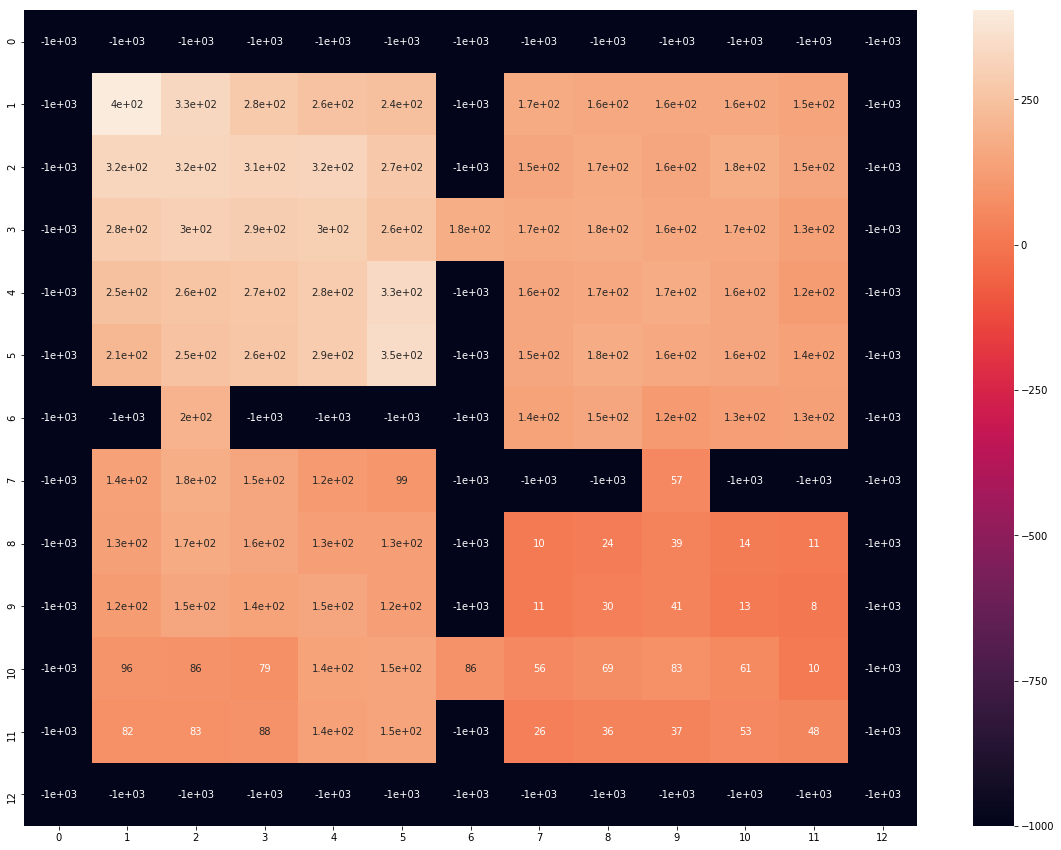

In [25]:
show_hist2d(episode_o200_df, (20, 15))
show_hist2d(q_episode_o200_df, (20, 15))

### 結果
* 右上のルームの左下周辺の状態への訪問回数が多い．
* 800エピソードで，6000回以上訪問しているので，平均１エピソードあたり，7~8回訪問していることになる．
* Q学習と比較すると，一部分での繰り返しが目立つ．右上のRoomの左下の状態で留まってしまっていることがわかる．

### 考察
* Subgoal1とSubgoal２の中間地点という特徴がある．両方のShaping　Rewardの影響を受けてしまっている可能性．
* 状態46と52での行動選択はどうなっているか？

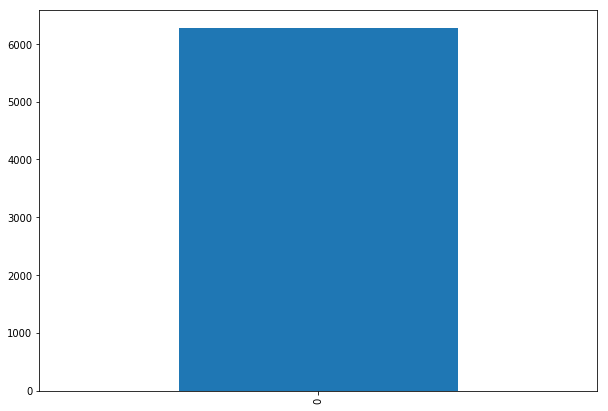

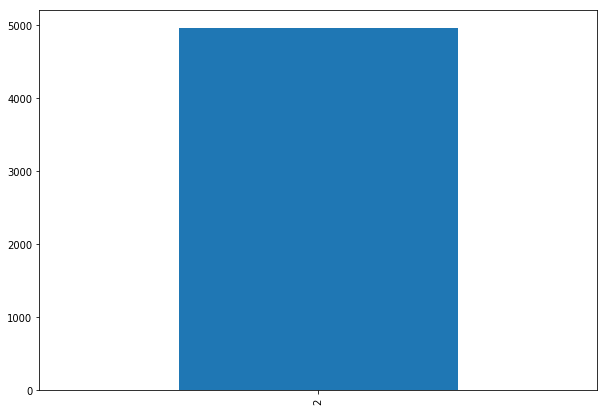

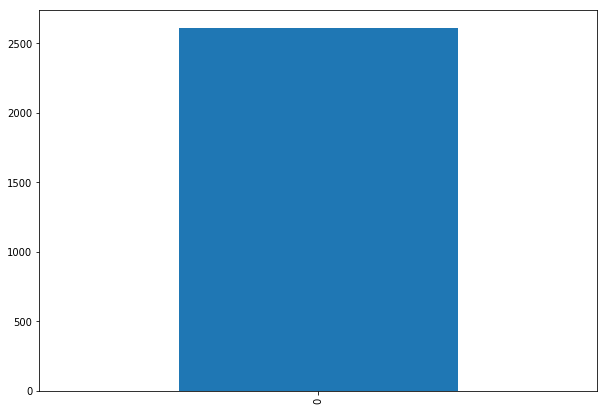

0    2609
Name: action, dtype: int64

In [42]:
conditioned_df= episode_o200_df[episode_o200_df["state"] == 46]
show_hist(conditioned_df, col="action")
conditioned_df = episode_o200_df[episode_o200_df["state"] == 52]
show_hist(conditioned_df, col="action")
conditioned_df = episode_o200_df[episode_o200_df["state"] == 36]
show_hist(conditioned_df, col="action")

### 上記の結果分析
* 0は下，2は上
* 左下隅の状態=52で上に行くという選択をしてしまっている．これが原因

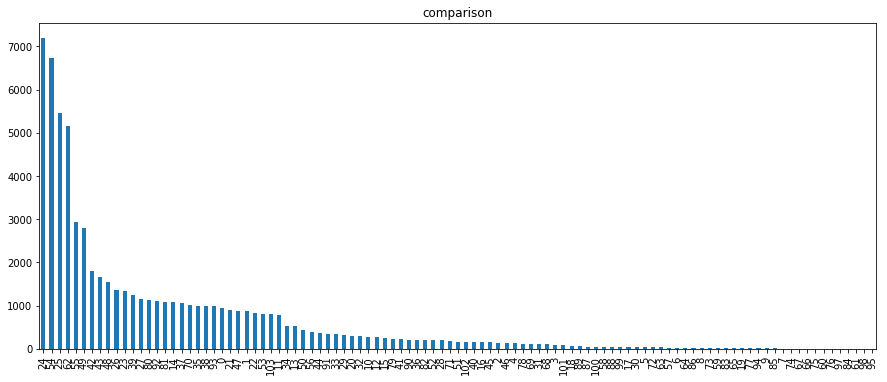

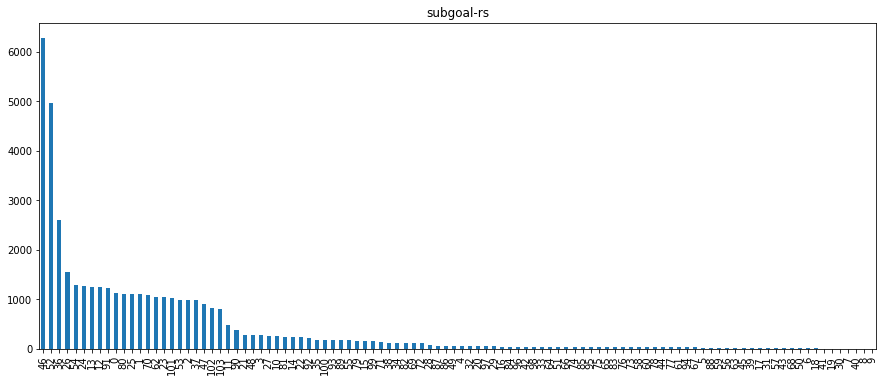

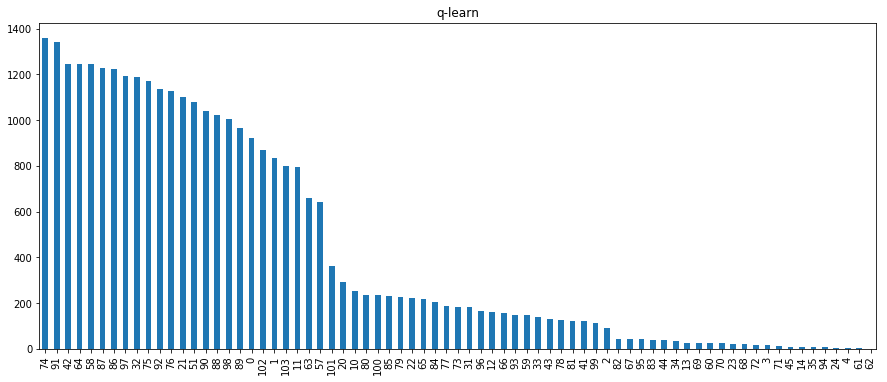

In [51]:
all_rooms = list(range(104))
conditioned_df = conditioned(all_rooms, c_episode_o200_df)
_ = show_hist(conditioned_df, (15, 6), "comparison")
conditioned_df = conditioned(all_rooms, episode_o200_df)
_ = show_hist(conditioned_df, (15, 6), "subgoal-rs")
conditioned_df = conditioned(all_rooms, q_episode_o200_df)
_ = show_hist(conditioned_df, (15, 6), "q-learn")

## 分析
46, 52周辺の状態への遷移回数が多い．
ここで停滞してしまっている可能性が高い．

# Roomごとの訪問頻度


== lower_left ==


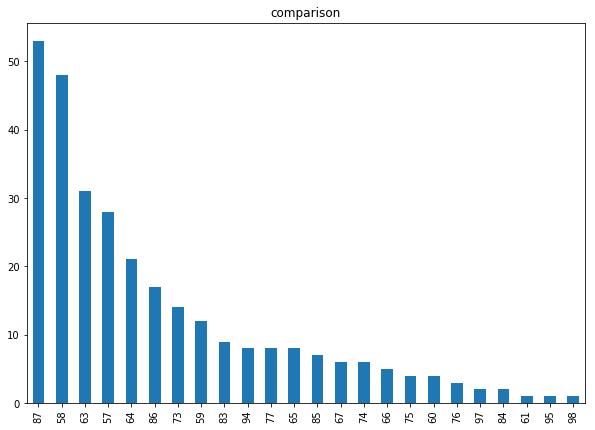

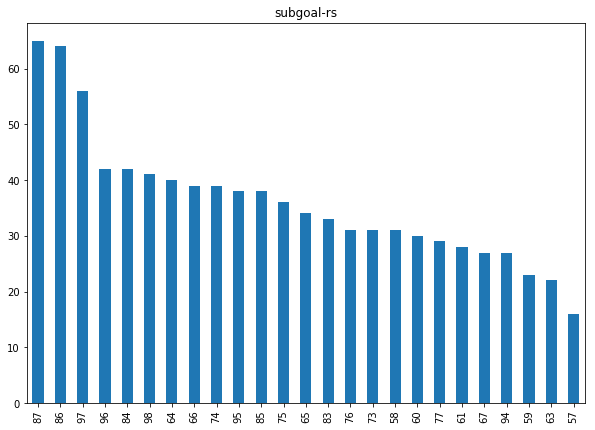

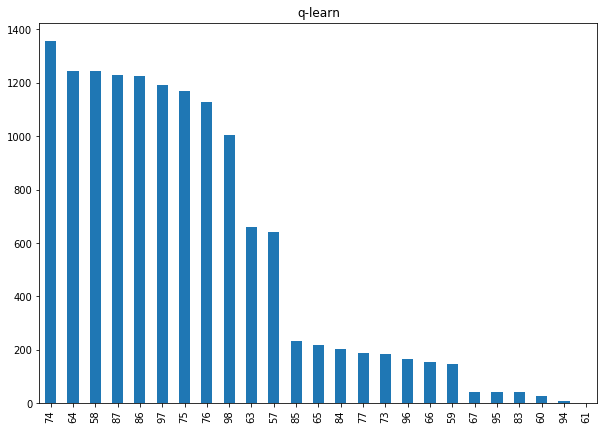

== lower_right ==


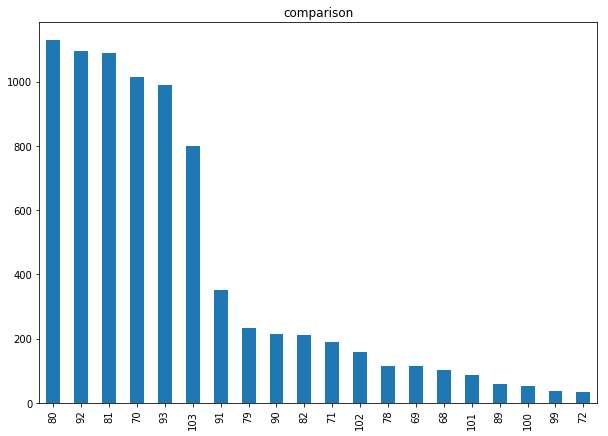

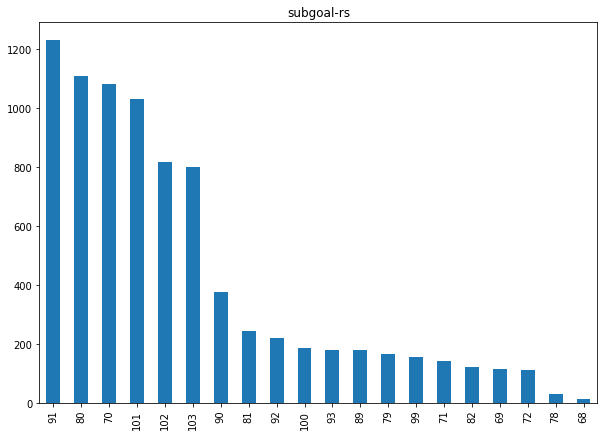

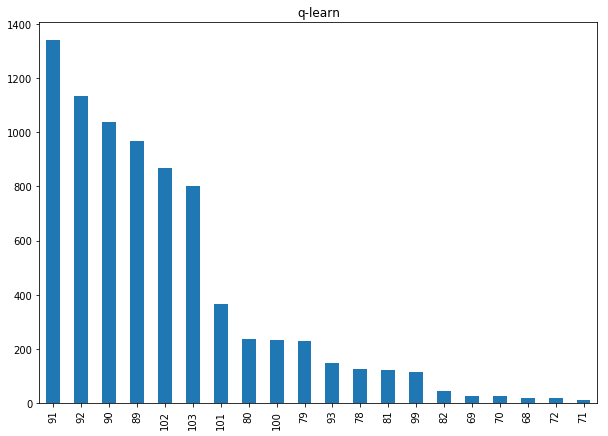

== upper_left ==


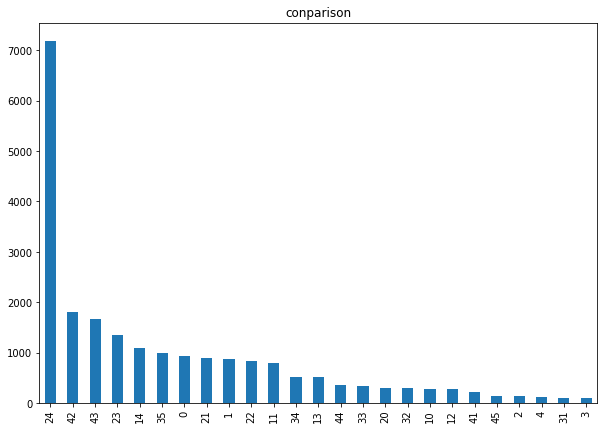

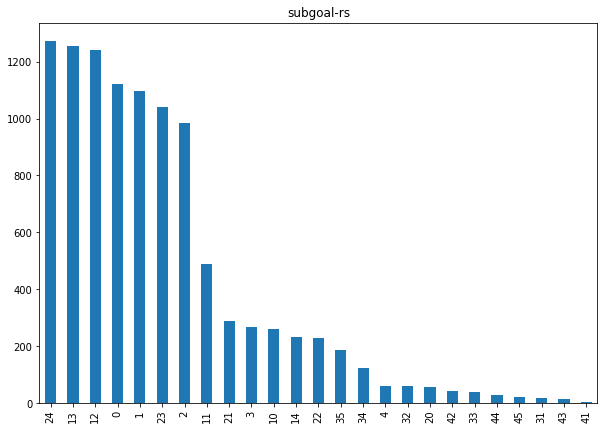

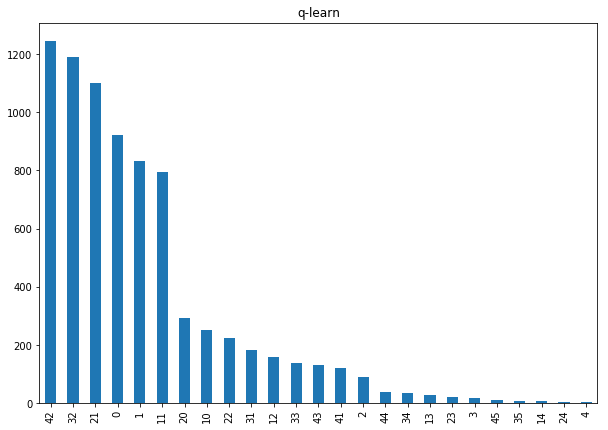

== upper_right ==


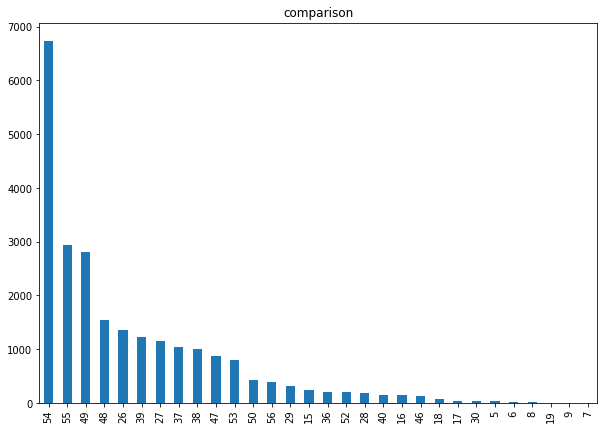

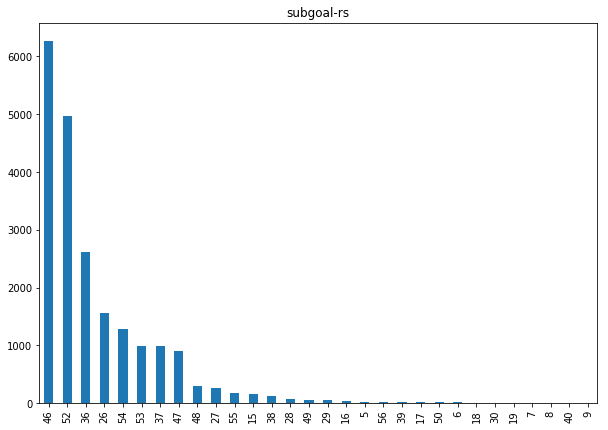

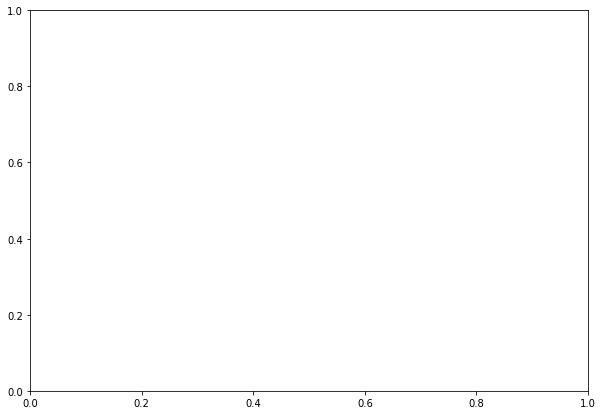

In [53]:
print("== lower_left ==")
conditioned_df = conditioned(lower_left, c_episode_o200_df)
_ = show_hist(conditioned_df, title="comparison")
conditioned_df = conditioned(lower_left, episode_o200_df)
_ = show_hist(conditioned_df, title="subgoal-rs")
conditioned_df = conditioned(lower_left, q_episode_o200_df)
_ = show_hist(conditioned_df, title="q-learn")
print("== lower_right ==")
conditioned_df = conditioned(lower_right, c_episode_o200_df)
_ = show_hist(conditioned_df, title="comparison")
conditioned_df = conditioned(lower_right, episode_o200_df)
_ = show_hist(conditioned_df, title="subgoal-rs")
conditioned_df = conditioned(lower_right, q_episode_o200_df)
_ = show_hist(conditioned_df, title="q-learn")
print("== upper_left ==")
conditioned_df = conditioned(upper_left, c_episode_o200_df)
_ = show_hist(conditioned_df, title="conparison")
conditioned_df = conditioned(upper_left, episode_o200_df)
_ = show_hist(conditioned_df, title="subgoal-rs")
conditioned_df = conditioned(upper_left, q_episode_o200_df)
_ = show_hist(conditioned_df, title="q-learn")
print("== upper_right ==")
conditioned_df = conditioned(upper_right, c_episode_o200_df)
_ = show_hist(conditioned_df, title="comparison")
conditioned_df = conditioned(upper_right, episode_o200_df)
_ = show_hist(conditioned_df, title="subgoal-rs")
conditioned_df = conditioned(upper_right, q_episode_o200_df)
_ = show_hist(conditioned_df, title="q-learn")


hall_way


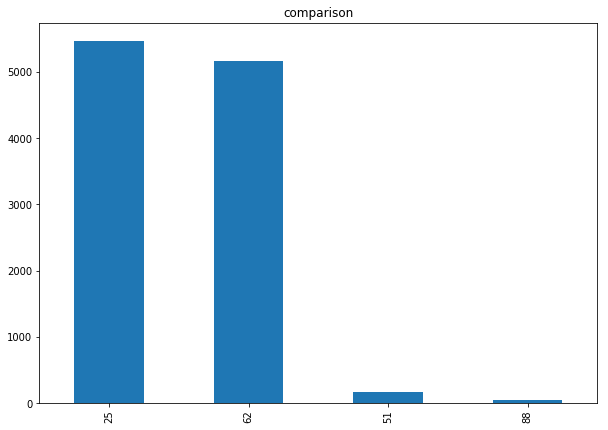

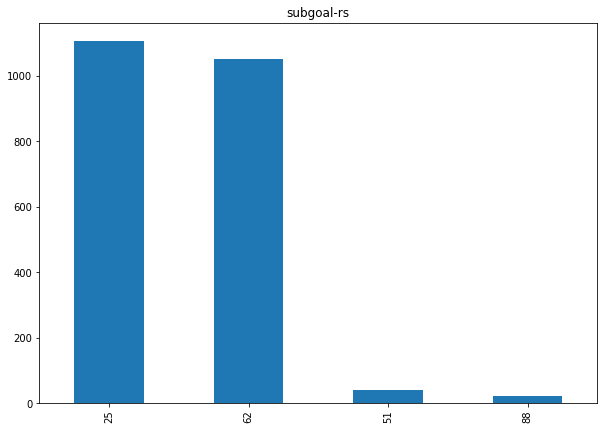

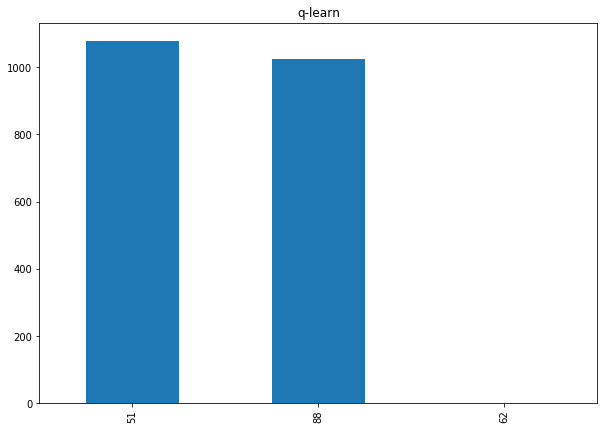

51    1079
88    1024
62       1
Name: state, dtype: int64

In [54]:
print("hall_way")
conditioned_df = conditioned(hall_way, c_episode_o200_df)
show_hist(conditioned_df, title="comparison")
conditioned_df = conditioned(hall_way, episode_o200_df)
show_hist(conditioned_df, title="subgoal-rs")
conditioned_df = conditioned(hall_way, q_episode_o200_df)
show_hist(conditioned_df, title="q-learn")

### 上記結果の分析
25と62の訪問回数が残りの2つに比べて多い <- 右上のRoomを通るエピソードが学習された．
800エピソードを対象としているため，25と62の状態を各エピソードで１回ずつ訪問したとしても，200~300回ほど余分に訪問している．

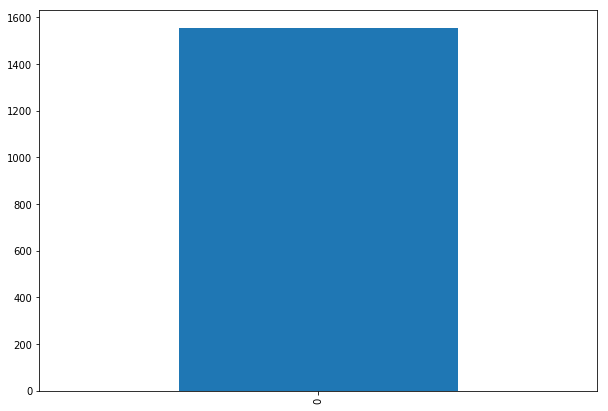

0    1553
Name: action, dtype: int64

In [43]:
conditioned_df = episode_o200_df[episode_o200_df["state"] == 26]
show_hist(conditioned, col="action")